# 완전 연결 신경망

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/nn-in-tf2/blob/master/fully_connected.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/nn-in-tf2/blob/master/fully_connected.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

구글 코랩에는 텐서플로 1.x 버전이 설치되어 있습니다. 다음 셀의 주석을 제거하고 텐서플로 2.0.0-rc0 버전을 설치하세요.

In [1]:
#!pip install tensorflow-gpu==2.0.0-rc0

## 보스턴 주택 데이터셋 적재

보스턴 주택 데이터셋을 사용하여 신경망을 훈련하겠습니다. 이 데이터셋은 1970년대 보스턴 인근 지역의 주택에 관한 정보를 기록한 것입니다. 주택에 관한 정보를 바탕으로 주택의 가격을 예측하는 회귀(Regression) 문제입니다.

텐서플로에서 직접 이 데이터를 다운로드할 수 있습니다. 먼저 텐서플로의 케라스 모듈을 임포트합니다.

In [2]:
from tensorflow import keras

`datasets.boston_housing.load_data()` 함수는 모델 훈련에 사용할 데이터와 테스트에 사용할 데이터를 나누어 넘파이 배열로 전달합니다. 이 데이터를 각각 훈련 세트, 테스트 세트라고 부르겠습니다.

`load_data()` 함수는 기본적으로 전체 데이터에서 20%를 테스트 세트로 떼어내어 반환합니다. y_train과 y_test는 맞추어야 할 주택 가격 데이터입니다. 이를 타깃 데이터라고 부릅니다.

In [104]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

사용할 데이터의 크기를 확인해 보겠습니다. 넘파이 배열의 shape 속성에서 훈련 세트의 크기를 확인할 수 있습니다. 

In [105]:
print(x_train.shape, y_train.shape)

(404, 13) (404,)


`x_train`은 404개의 샘플이 있고 각 샘플은 13개의 특성으로 이루어져 있습니다. 즉 404개의 행이 있고 13개의 열이 있는 2차원 배열입니다. 이를 2차원 행렬로 생각하면 편리합니다.

`y_train`은 404개의 주택 가격을 가진 1차원 배열로 1,000 달러 단위의 값입니다.

`x_test`와 `y_test`의 크기도 확인해 보겠습니다.

In [106]:
print(x_test.shape, y_test.shape)

(102, 13) (102,)


특성의 개수는 13개로 동일합니다. 테스트 세트는 102개의 훈련 샘플이 포함되어 있습니다.

## 데이터 전처리

신경망은 입력 특성이 비슷한 스케일을 가져야 잘 작동합니다. 보스턴 주택 데이터의 값의 범위를 상자 수염 그래프로 확인해 보겠습니다.

그래프를 그리기 위해 맷플롯립 패키지를 임포트합니다.

In [118]:
import matplotlib.pyplot as plt

`boxplot()` 함수로 상자 수염 그래프를 그립니다.

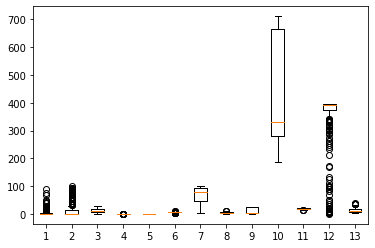

In [120]:
plt.boxplot(x_train)
plt.show()

그래프에서 볼 수 있듯이 10번째와 12번째 특성은 값의 범위가 매우 큽니다. 이렇게 값의 범위가 크게 다르면 모델이 잘 훈련되기 어렵습니다.

특성 값을 맞추는 대표적인 방법은 표준화입니다. 표준화는 특성별로 평균을 0, 분산을 1로 맞춥니다. 표준화를 하려면 훈련 세트에서 특성별로 평균과 표준 편차를 구해야 합니다.

넘파이 배열 객체의 `mean()`, `std()` 메서드를 사용하면 평균과 표준 편차를 쉽게 구할 수 있습니다. `axis=0`으로 지정하면 특성(열)을 따라 값을 계산합니다.

In [121]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train_scaled = (x_train - mean) / std

변환한 훈련 세트를 사용하여 모델을 훈련할 것입니다. 훈련된 모델을 테스트 세트로 평가해야 하기 때문에 테스트 세트의 특성도 동일하게 표준화해야 합니다.

여기에서 주의할 점은 테스트 세트의 평균과 표준 편차를 구해서는 안된다는 것입니다. 테스트 세트가 훈련 세트와 다른 비율로 변환된다면 훈련 세트로 훈련한 모델이 쓸모 없게 되기 때문입니다.

꼭 훈련 세트의 값으로 테스트 세트를 변환하세요.

In [122]:
x_test_scaled = (x_test - mean) / std

In [108]:
model = keras.Sequential()

In [109]:
model.add(keras.layers.Dense(64, activation='sigmoid', input_shape=(13,)))
model.add(keras.layers.Dense(1))

In [110]:
model.compile(loss='mae', 
              optimizer="adam")

In [111]:
history = model.fit(x_train_scaled, y_train, epochs=100)

Train on 404 samples
Epoch 1/100
404/404 [==============================] - 0s 505us/sample - loss: 22.9372
Epoch 2/100
404/404 [==============================] - 0s 45us/sample - loss: 22.4802
Epoch 3/100
404/404 [==============================] - 0s 39us/sample - loss: 22.0243
Epoch 4/100
404/404 [==============================] - 0s 42us/sample - loss: 21.5685
Epoch 5/100
404/404 [==============================] - 0s 40us/sample - loss: 21.1123
Epoch 6/100
404/404 [==============================] - 0s 40us/sample - loss: 20.6551
Epoch 7/100
404/404 [==============================] - 0s 40us/sample - loss: 20.1954
Epoch 8/100
404/404 [==============================] - 0s 40us/sample - loss: 19.7326
Epoch 9/100
404/404 [==============================] - 0s 40us/sample - loss: 19.2649
Epoch 10/100
404/404 [==============================] - 0s 37us/sample - loss: 18.7941
Epoch 11/100
404/404 [==============================] - 0s 39us/sample - loss: 18.3170
Epoch 12/100
404/404 [========

404/404 [==============================] - 0s 42us/sample - loss: 3.3233
Epoch 96/100
404/404 [==============================] - 0s 41us/sample - loss: 3.3137
Epoch 97/100
404/404 [==============================] - 0s 41us/sample - loss: 3.3113
Epoch 98/100
404/404 [==============================] - 0s 39us/sample - loss: 3.3087
Epoch 99/100
404/404 [==============================] - 0s 39us/sample - loss: 3.3027
Epoch 100/100
404/404 [==============================] - 0s 43us/sample - loss: 3.3026


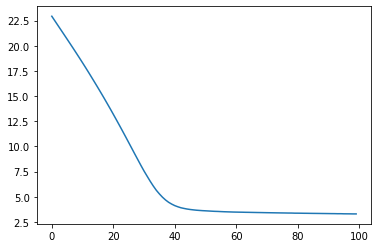

In [112]:
plt.plot(history.history['loss'])

In [113]:
model.evaluate(x_test_scaled, y_test, verbose=0)

3.3856504103716683

In [116]:
model.predict(x_test_scaled[0:5])

array([[10.129075],
       [20.162893],
       [21.138596],
       [27.941038],
       [24.1763  ]], dtype=float32)

In [117]:
print(y_test[0:5])

[ 7.2 18.8 19.  27.  22.2]
